In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('dark_background')
sns.set()
#plt.rcParams['figure.figsize'] = [8, 6]
#%matplotlib inline
%matplotlib

Using matplotlib backend: Qt5Agg


## Correlations stats

In [9]:
#corr = pd.read_csv("./genomes_corr.csv")
#corr = pd.read_csv("./contamination/s_enterica/s_enterica_corr.csv")
#corr = pd.read_csv("./contamination/v_cholerae/v_cholerae_corr.csv")
corr = pd.read_csv("./s_marcescens_corr.csv")
corr.head()

,corr,contamination
0,0.774196,0.05
1,0.787862,0.05
2,0.598760,0.05
3,0.596309,0.05
4,0.718206,0.05


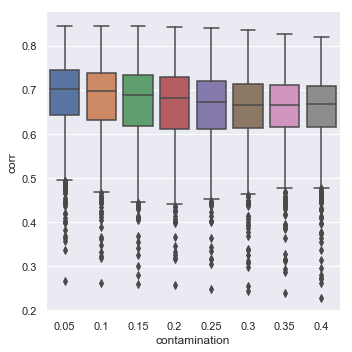

In [10]:
sns.catplot(x='contamination', y='corr', data=corr, kind='box')

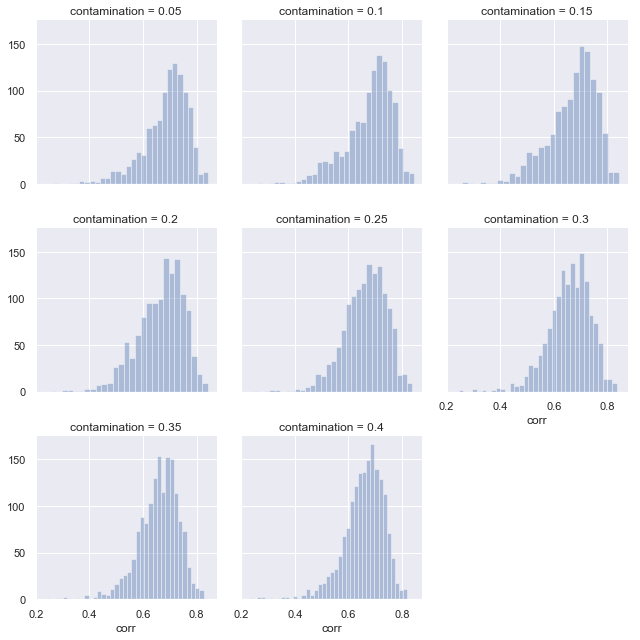

In [11]:

g = sns.FacetGrid(corr, col="contamination", col_wrap=3)
g = g.map(sns.distplot, "corr", kde=False)


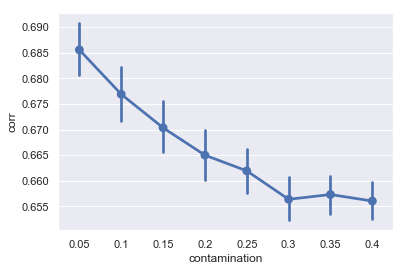

In [12]:
sns.pointplot(x='contamination', y='corr', x_estimator=np.mean, data=corr)

## PCA 

In [11]:
z_scores = pd.read_csv("./pca2_z.csv")

X = z_scores.values
labels = X[:,-1]
X = X[:,:-1]

pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

In [12]:
#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

In [13]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)

In [6]:
# 3D PCA

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

bins={}
for i in z_scores.contamination.unique():
    sub = pca_df[pca_df['genome']==i]
    ax.scatter(sub['PC1'], sub['PC2'], sub['PC3'], 
               label=i, alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

KeyError: 'bin'

In [10]:
# 3D PCA

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

bins={}
for i in z_scores.contamination.unique():
    sub = pca_df[pca_df['genome']==i]
    ax.scatter(sub['PC1'], sub['PC2'], sub['PC3'], 
               label=i.split('.')[0], alpha=0.5, marker='.')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

In [ ]:
z_scores.contamination.unique()

In [ ]:
for i in z_scores.groupby('contamination'):
    print(i)